In [1]:
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt

#for random forest model generation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc


# **Loading Data**

In [2]:
custData = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
custData.shape

(9134, 24)

### The **Response** variable indicates whether the user is engaged with marketing initiatives.
#### **Yes**: Customer engaged with the Marketing effort
#### **No**: Customer didn't engage with the Marketing effort made

In [3]:
custData['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [4]:
#creating dummy varaibles for the output categorical variable 'Response'
responses = {'Yes':1, 'No':0}
custData['Response'] = custData['Response'].str.strip().map(responses)
custData.head()
custData.shape

(9134, 24)

In [5]:
print("The average response rate to marketing initiative is {:.2f}%" .format(custData['Response'].mean()*100))

The average response rate to marketing initiative is 14.32%


# **Feature Engineering**

In [6]:
custData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   int64  
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### The types of variables that exist in the dataset are continuous (**int64 and float64**) and **object**
### Next, check for null values for all these variables

In [7]:
#provides statistical information on the integer and float dtype variables
custData.describe()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,0.143201,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,0.350297,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,0.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,0.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,1.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Thus, no null values for the continuous fields in the dataset

In [8]:
#check for null values in the variables with datatype object
print(custData.select_dtypes(include=['object']).isnull().sum())

Customer             0
State                0
Coverage             0
Education            0
Effective To Date    0
EmploymentStatus     0
Gender               0
Location Code        0
Marital Status       0
Policy Type          0
Policy               0
Renew Offer Type     0
Sales Channel        0
Vehicle Class        0
Vehicle Size         0
dtype: int64


### Similar to the numeric fields, no null values found in the object datatype fields

In [9]:
cols = custData.columns
numCols = custData._get_numeric_data().columns
print(numCols)
catCols = list(set(cols) - set(numCols))
print(catCols)

Index(['Customer Lifetime Value', 'Response', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')
['Location Code', 'Renew Offer Type', 'EmploymentStatus', 'Policy Type', 'Vehicle Class', 'Education', 'Effective To Date', 'State', 'Marital Status', 'Coverage', 'Vehicle Size', 'Customer', 'Policy', 'Sales Channel', 'Gender']


In [10]:
colsToEncode = ['Sales Channel','EmploymentStatus','Policy','Vehicle Class','State','Renew Offer Type','Coverage','Marital Status','Vehicle Size','Education','Policy Type','Location Code']

for col in colsToEncode:
  encodedDf = pd.get_dummies(custData[col])
  encodedDf.columns = [col.replace(' ','.') + "."+ i for i in encodedDf.columns]
  custData = pd.concat([custData, encodedDf], axis = 1)

custData['Is.Female'] = custData['Gender'].apply(lambda x: 1 if x == 'F' else 0)



In [11]:
custData.shape

(9134, 78)

In [12]:
custData.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Sales.Channel.Agent,Sales.Channel.Branch,Sales.Channel.Call Center,Sales.Channel.Web,EmploymentStatus.Disabled,EmploymentStatus.Employed,EmploymentStatus.Medical Leave,EmploymentStatus.Retired,EmploymentStatus.Unemployed,Policy.Corporate L1,Policy.Corporate L2,Policy.Corporate L3,Policy.Personal L1,Policy.Personal L2,Policy.Personal L3,Policy.Special L1,Policy.Special L2,Policy.Special L3,Vehicle.Class.Four-Door Car,Vehicle.Class.Luxury Car,Vehicle.Class.Luxury SUV,Vehicle.Class.SUV,Vehicle.Class.Sports Car,Vehicle.Class.Two-Door Car,State.Arizona,State.California,State.Nevada,State.Oregon,State.Washington,Renew.Offer.Type.Offer1,Renew.Offer.Type.Offer2,Renew.Offer.Type.Offer3,Renew.Offer.Type.Offer4,Coverage.Basic,Coverage.Extended,Coverage.Premium,Marital.Status.Divorced,Marital.Status.Married,Marital.Status.Single,Vehicle.Size.Large,Vehicle.Size.Medsize,Vehicle.Size.Small,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Policy.Type.Corporate Auto,Policy.Type.Personal Auto,Policy.Type.Special Auto,Location.Code.Rural,Location.Code.Suburban,Location.Code.Urban,Is.Female
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0


In [13]:
#Dropping the original categorical features 
custData.drop(colsToEncode, axis=1, inplace = True)
custData.drop(['Gender','Customer','Effective To Date'], axis= 1, inplace= True)
custData.head()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Sales.Channel.Agent,Sales.Channel.Branch,Sales.Channel.Call Center,Sales.Channel.Web,EmploymentStatus.Disabled,EmploymentStatus.Employed,EmploymentStatus.Medical Leave,EmploymentStatus.Retired,EmploymentStatus.Unemployed,Policy.Corporate L1,Policy.Corporate L2,Policy.Corporate L3,Policy.Personal L1,Policy.Personal L2,Policy.Personal L3,Policy.Special L1,Policy.Special L2,Policy.Special L3,Vehicle.Class.Four-Door Car,Vehicle.Class.Luxury Car,Vehicle.Class.Luxury SUV,Vehicle.Class.SUV,Vehicle.Class.Sports Car,Vehicle.Class.Two-Door Car,State.Arizona,State.California,State.Nevada,State.Oregon,State.Washington,Renew.Offer.Type.Offer1,Renew.Offer.Type.Offer2,Renew.Offer.Type.Offer3,Renew.Offer.Type.Offer4,Coverage.Basic,Coverage.Extended,Coverage.Premium,Marital.Status.Divorced,Marital.Status.Married,Marital.Status.Single,Vehicle.Size.Large,Vehicle.Size.Medsize,Vehicle.Size.Small,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Policy.Type.Corporate Auto,Policy.Type.Personal Auto,Policy.Type.Special Auto,Location.Code.Rural,Location.Code.Suburban,Location.Code.Urban,Is.Female
0,2763.519279,0,56274,69,32,5,0,1,384.811147,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1
1,6979.535903,0,0,94,13,42,0,8,1131.464935,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1
2,12887.431650,0,48767,108,18,38,0,2,566.472247,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1
3,7645.861827,0,0,106,18,65,0,7,529.881344,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4,2813.692575,0,43836,73,12,44,0,1,138.130879,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0


## **Training and Testing Split**

In [14]:
allFeatures = custData.columns[custData.columns != 'Response']
outputVar = 'Response'

In [15]:
x_train, x_test, y_train, y_test = train_test_split(custData[allFeatures], custData[outputVar], test_size= 0.3)

In [16]:
#Building the RF model
rf_model = RandomForestClassifier(n_estimators= 200, max_depth= 5)

#Fit model to training data
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
#looking at individual trees
rf_model.estimators_

#individual tree setting
rf_model.estimators_[0]

#individual tree predictions
rf_model.estimators_[0].predict(x_test)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Here we can see how Tree Number 0 voted on the first 10 samples

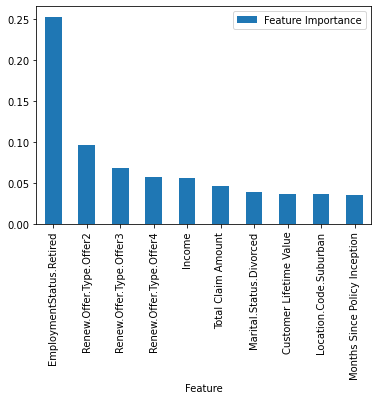

In [18]:
#Important features according to Random Forest

featureImportancesDf = pd.DataFrame(list(zip(allFeatures,rf_model.feature_importances_)), columns=['Feature', 'Feature Importance'])
featureImportancesDf.sort_values(by=['Feature Importance'],ascending=False, inplace= True)
top10 = featureImportancesDf.head(10)
top10.plot(kind = 'bar', x='Feature')

### According to the model, retired employees tend to engage with the marketing campaign the most. 

## **Model Evaluation**

In [38]:
# Accuracy Measure
print("The in sample accuracy is %0.2f" % accuracy_score(y_train, rf_model.predict(x_train)))
print("The out of sample accuracy is %0.2f" % accuracy_score(y_test, rf_model.predict(x_test)))

The in sample accuracy is 0.87
The out of sample accuracy is 0.88


In [39]:
# Precision Measure
print("The in sample precision is %0.2f" % precision_score(y_train, rf_model.predict(x_train)))
print("The out of sample precision is %0.2f" % precision_score(y_test, rf_model.predict(x_test)))

The in sample precision is 1.00
The out of sample precision is 0.97


### Precision is a measure of the number of true positives divided by the number of true positives and false positives. Gives an idea about how much of the predictions are correct. 
### In this case, precision represents:

### **How many customers actually engaged with campaign 'X' than those who were predicted to and did not.**


In [40]:
# Recall Measure
print("The in sample precision is %0.2f" % recall_score(y_train, rf_model.predict(x_train)))
print("The out of sample precision is %0.2f" % recall_score(y_test, rf_model.predict(x_test)))

The in sample precision is 0.12
The out of sample precision is 0.10


### Recall is a measure of the number of true positives divided by the number of true positives and false negatives. 
### In this case, Recall represents: 

### **How many customers did the model correctly predict that engaged with campaign 'X' against those that actually did.**

In [59]:
# ROC and AUC curve
in_sample = rf_model.predict_proba(x_train)[:,1]
out_sample = rf_model.predict_proba(x_test)[:,1]
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample)

print("In sample AUC is: %0.4f" % auc(in_sample_fpr, in_sample_tpr))
print("Out of sample AUC is: %0.4f" % auc(out_sample_fpr, out_sample_tpr))


In sample AUC is: 0.8874
Out of sample AUC is: 0.8728


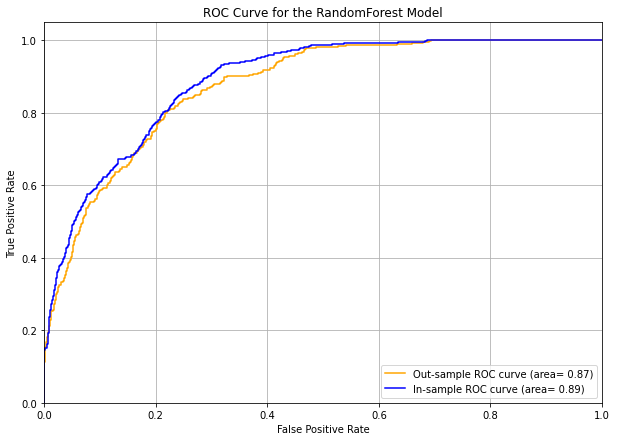

In [66]:
plt.figure(figsize= (10,7))

plt.plot(out_sample_fpr, out_sample_tpr, color = 'orange', label = 'Out-sample ROC curve (area= %0.2f)' % auc(out_sample_fpr, out_sample_tpr))
plt.plot(in_sample_fpr, in_sample_tpr, color = 'blue', label = 'In-sample ROC curve (area= %0.2f)' % auc(in_sample_fpr, in_sample_tpr))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the RandomForest Model')
plt.legend(loc = "lower right" )
plt.grid()
plt.show()

### When the gap between the two curves gets larger, its a sign of the model over fitting to the training data and not finding the general pattern of engagement. There is no indiacation of overfitting from this graph